In [576]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker


In [577]:
# Train Dataset (x_train)
train_FD001 = "C:/Users/JAHNAVI/Desktop/archive/CMaps/train_FD001.txt"
train_FD002 = "C:/Users/JAHNAVI/Desktop/archive/CMaps/train_FD002.txt"
train_FD003 = "C:/Users/JAHNAVI/Desktop/archive/CMaps/train_FD003.txt"
train_FD004 = "C:/Users/JAHNAVI/Desktop/archive/CMaps/train_FD004.txt"



In [578]:
# Loading the data
def load_data(filepath):
    df = pd.read_csv(filepath, sep=' ', header=None)
    return df

df_1 = load_data(train_FD001)
df_1.head()



,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [579]:
# Checking for NaN values
def check_nan(df):
    print("Total number of NaN values:\n", df.isna().sum())

check_nan(df_1)


Total number of NaN values:
 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    20631
27    20631
dtype: int64


In [580]:
# Removing the columns with all NaN vaues
def remove_nan(df):
    df = df.dropna(axis=1, how='all')
    return df

df_1 = remove_nan(df_1)
df_1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [581]:
df_1.shape

(20631, 26)

In [582]:
# Assigning Column Names
def column_names(df):
    # Define column names
    column_names = ['unit_number', 'time_in_cycles', 'setting_1', 'setting_2', 'setting_3'] + [f'S_{i}' for i in range(1, 22)]
    df.columns = column_names
    return df

df_1 = column_names(df_1)


# explanation after describe
# Visualize if possible

In [583]:
df_1.head()

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,S_1,S_2,S_3,S_4,S_5,...,S_12,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_20,S_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [584]:
df_1.isna().sum()

unit_number       0
time_in_cycles    0
setting_1         0
setting_2         0
setting_3         0
S_1               0
S_2               0
S_3               0
S_4               0
S_5               0
S_6               0
S_7               0
S_8               0
S_9               0
S_10              0
S_11              0
S_12              0
S_13              0
S_14              0
S_15              0
S_16              0
S_17              0
S_18              0
S_19              0
S_20              0
S_21              0
dtype: int64

In [585]:
df_1.loc[:,['unit_number','time_in_cycles']].describe()

,unit_number,time_in_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [586]:
df_1.loc[:,['setting_1','setting_2','setting_3']].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [587]:
df_1.loc[:,'S_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
S_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
S_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
S_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
S_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
S_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
S_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
S_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
S_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
S_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [588]:
df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
S_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
S_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
S_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
S_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
S_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [589]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   setting_1       20631 non-null  float64
 3   setting_2       20631 non-null  float64
 4   setting_3       20631 non-null  float64
 5   S_1             20631 non-null  float64
 6   S_2             20631 non-null  float64
 7   S_3             20631 non-null  float64
 8   S_4             20631 non-null  float64
 9   S_5             20631 non-null  float64
 10  S_6             20631 non-null  float64
 11  S_7             20631 non-null  float64
 12  S_8             20631 non-null  float64
 13  S_9             20631 non-null  float64
 14  S_10            20631 non-null  float64
 15  S_11            20631 non-null  float64
 16  S_12            20631 non-null  float64
 17  S_13            20631 non-null 

In [590]:
df_1.nunique()

unit_number        100
time_in_cycles     362
setting_1          158
setting_2           13
setting_3            1
S_1                  1
S_2                310
S_3               3012
S_4               4051
S_5                  1
S_6                  2
S_7                513
S_8                 53
S_9               6403
S_10                 1
S_11               159
S_12               427
S_13                56
S_14              6078
S_15              1918
S_16                 1
S_17                13
S_18                 1
S_19                 1
S_20               120
S_21              4745
dtype: int64

In [591]:
df_1.isnull().sum()

unit_number       0
time_in_cycles    0
setting_1         0
setting_2         0
setting_3         0
S_1               0
S_2               0
S_3               0
S_4               0
S_5               0
S_6               0
S_7               0
S_8               0
S_9               0
S_10              0
S_11              0
S_12              0
S_13              0
S_14              0
S_15              0
S_16              0
S_17              0
S_18              0
S_19              0
S_20              0
S_21              0
dtype: int64

In [592]:
df_1

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,S_1,S_2,S_3,S_4,S_5,...,S_12,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_20,S_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [593]:
# Calculation of Maximum time cycles for each engine(unit number)
def calculate_max_time_cycles(df):
    # Group the data by 'unit_number' and calculate the maximum for the specified columns
    max_time_cycles = df.groupby(['unit_number'])[["unit_number","time_in_cycles"]].max()

    return max_time_cycles

max_time_cycles = calculate_max_time_cycles(df_1)
max_time_cycles

,unit_number,time_in_cycles
unit_number,,
1,1,192
2,2,287
3,3,179
4,4,189
5,5,269
...,...,...
96,96,336
97,97,202
98,98,156


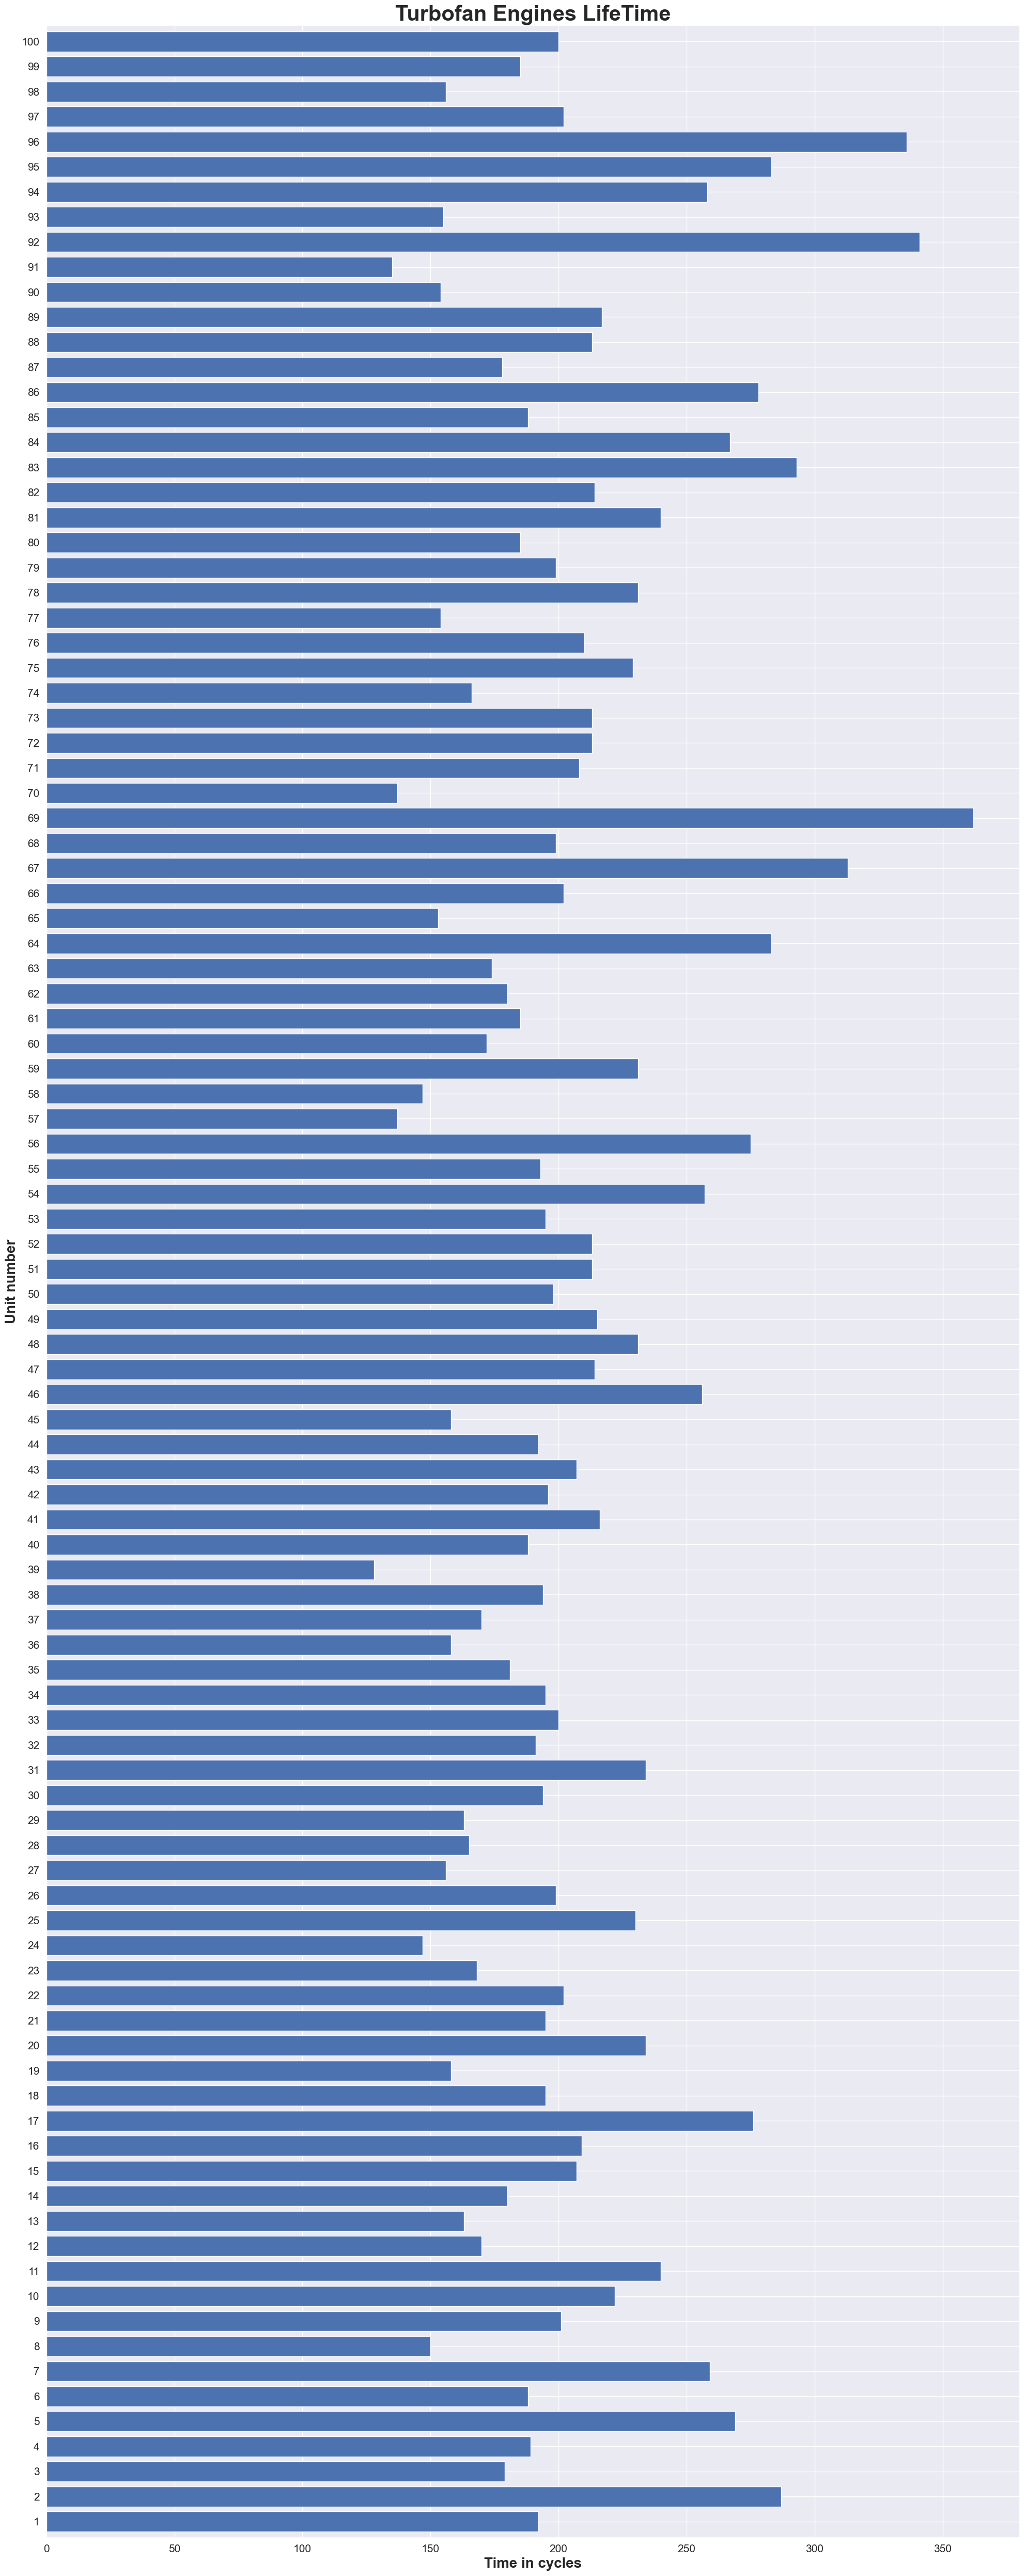

In [594]:
# plotting Turbofan Engines Lifetime
def plot_engines_lifetime(df, column_names):
    plt.figure(figsize=(20,50))
    ax=max_time_cycles['time_in_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
    plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
    plt.xlabel('Time in cycles',fontweight='bold',size=20)
    plt.xticks(size=15)
    plt.ylabel('Unit number',fontweight='bold',size=20)
    plt.yticks(size=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_engines_lifetime(max_time_cycles, 'time_in_cycles')

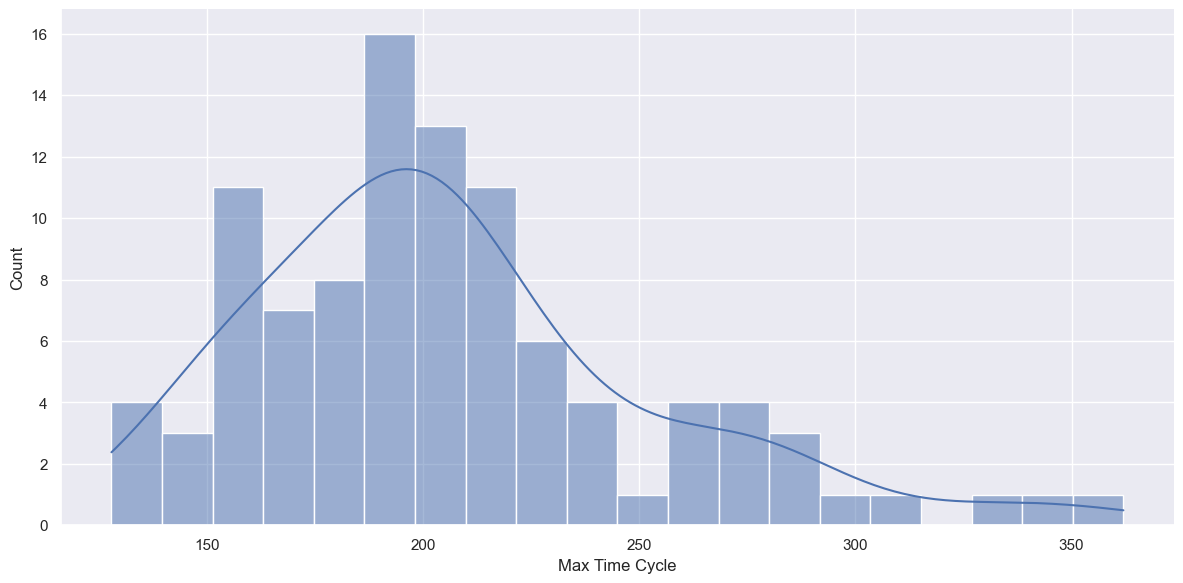

In [595]:
def plot_distribution(data, column, bins=20, height=6, aspect=2):

    # Create the distribution plot with KDE
    sns.displot(data[column], kde=True, bins=bins, height=height, aspect=aspect)
    plt.xlabel('Max Time Cycle')

    # Format x-axis ticks to display as integers
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

    plt.show()

plot_distribution(max_time_cycles, 'time_in_cycles', bins=20, height=6, aspect=2)

In [596]:
# Calculating RUL values
def calculate_RUL(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_in_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_in_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

df_RUL = calculate_RUL(df_1)
df_RUL

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,S_1,S_2,S_3,S_4,S_5,...,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_20,S_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [597]:
df_RUL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
S_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
S_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
S_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
S_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
S_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


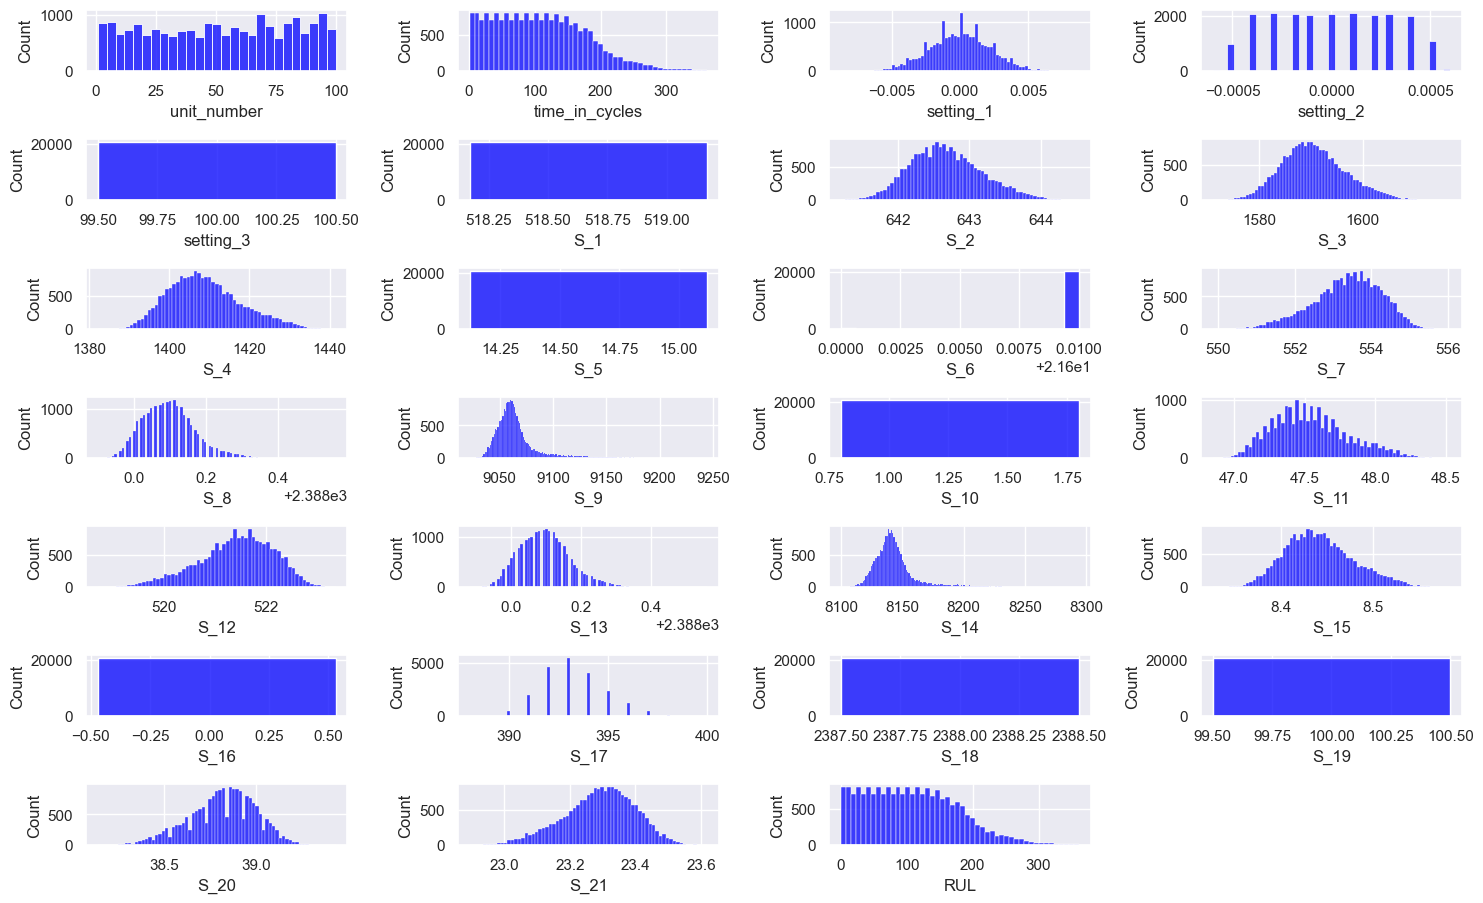

In [598]:
#Histogram representation of each sensor data

sns.set()
fig = plt.figure(figsize = [15,10])
cols = df_RUL.columns
cnt = 1
for col in cols :
    plt.subplot(8,4,cnt)
    sns.histplot(df_RUL[col],color='blue')
    cnt+=1
plt.tight_layout()
plt.show() 

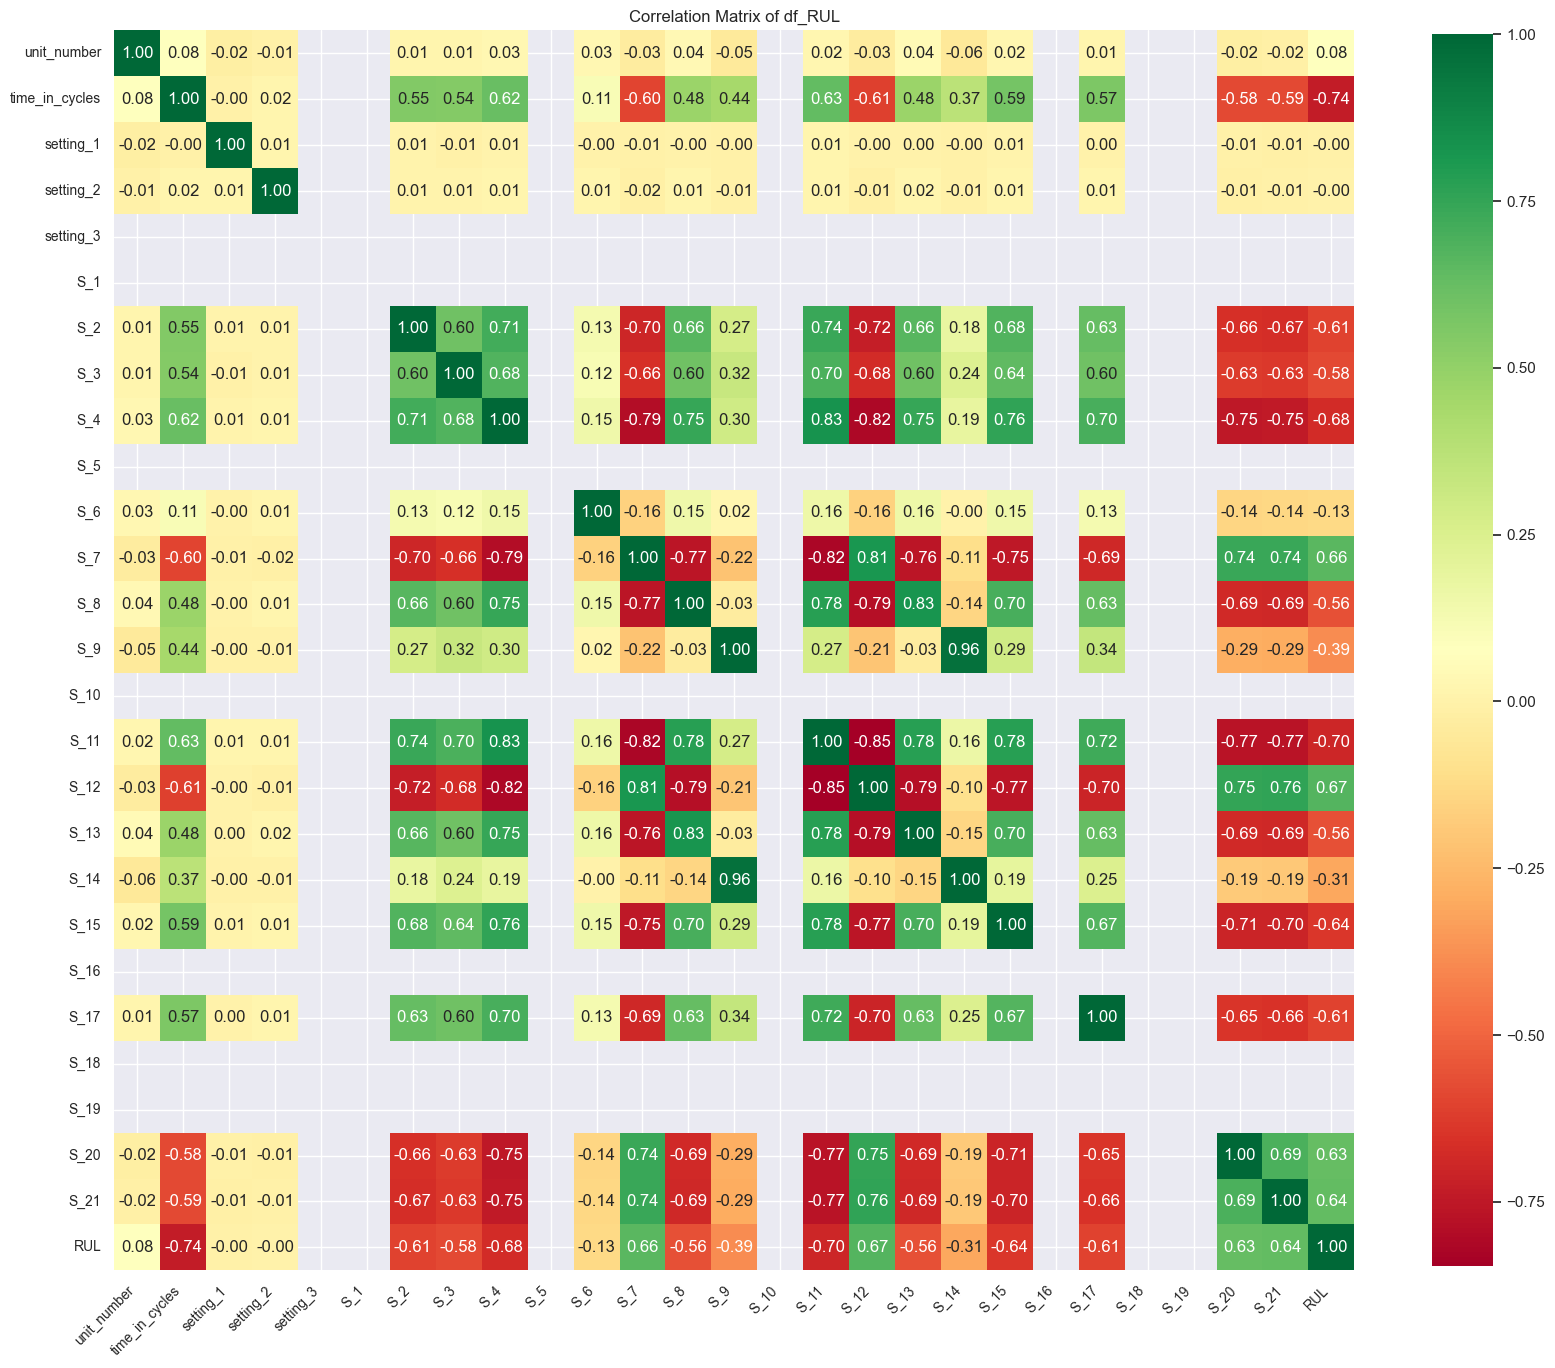

In [599]:
#Creating a heatmap to compare with RUL
corr = df_RUL.corr()

# Create a heatmap and annotate it
plt.figure(figsize=(20, 20))  # Set the size of the figure directly
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", square=True, cbar_kws={'shrink': .8})

# Adding labels (assuming column names are appropriate to be used directly)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability
plt.yticks(fontsize=10)  # Adjust y labels fontsize if needed

plt.title('Correlation Matrix of df_RUL')  # You can customize the title as needed
plt.show()

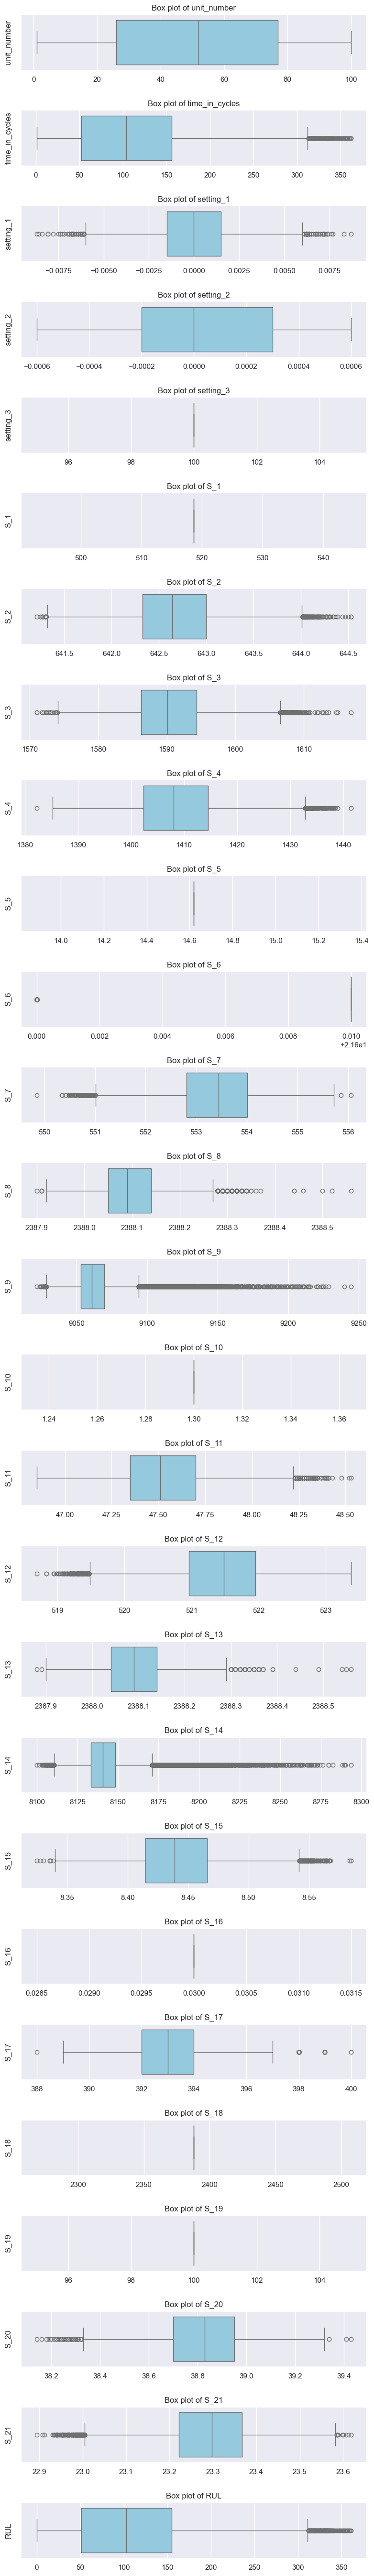

In [600]:
# Number of features (i.e., columns)
num_features = len(df_RUL.columns)

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, num_features * 2))

# If only one feature, turn axes into a list
if num_features == 1:
    axes = [axes]

# Iterate through features and create box plots
for ax, feature in zip(axes, df_RUL.columns):
    sns.boxplot(data=df_RUL, x=feature, ax=ax, color='skyblue')
    ax.set_title(f'Box plot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

Setting_1 and Setting_2: These settings show very low variance as observed in the histograms and box plots, indicating that they have almost constant values across the dataset. This is further supported by the very low correlation coefficients with RUL in the correlation matrix. Variables that do not change or vary minimally are unlikely to be useful in predictive modeling because they do not contribute to distinguishing between different states or conditions of the equipment.
Setting_3: The histogram and box plot indicate that this setting is also nearly constant across the dataset, which suggests it too does not vary enough to be useful in predicting RUL.

S_1, S_5, S_6, S_10, S_16, S_18, S_19: These sensors have correlations close to zero with RUL and also show very low variance in their box plots and histograms, suggesting they are constant or near-constant across many observations. Similar to the settings, sensors that exhibit minimal variance are less likely to be helpful in predicting changes or degradation over time, which is critical in estimating RUL.


Sensors and settings that are nearly constant (like S_1, S_5, S_6, S_10, S_16, S_18, S_19, Setting_1, Setting_2, Setting_3) provide little information for machine learning models. Their removal can simplify the model, reducing complexity and focusing on variables that actually change with the condition of the machinery.

In [601]:
# Dropping the unecessary columns
# Calculate the correlation matrix
corr = df_RUL.corr()

# Taking absolute value of the entire correlation matrix to consider both positive and negative correlations
abs_corr = corr.abs()

# Identifying columns that are weakly correlated across all variables (sum of correlations <= 1)
# This step might not be necessary depending on your specific needs, it's here based on your initial code snippet
cols_to_drop_by_sum = abs_corr.columns[abs_corr.sum() <= 1]

# Focus specifically on the correlation with 'RUL'
corr_with_rul = abs_corr['RUL']

# Set a correlation threshold below which columns will be considered weakly correlated with 'RUL'
correlation_threshold = 0.13  # Adjust this threshold based on your specific requirements

# Find columns with correlation to 'RUL' below the threshold
cols_to_drop_by_rul = corr_with_rul[corr_with_rul < correlation_threshold].index.tolist()

# Combine both lists of columns to drop, removing duplicates if any
cols_to_drop = list(set(cols_to_drop_by_sum.tolist() + cols_to_drop_by_rul))

# Ensure 'RUL' is not included in the drop list in case it's mistakenly caught by the threshold
if 'RUL' in cols_to_drop:
    cols_to_drop.remove('RUL')

# Dropping the low-correlated columns
df_cleaned = df_RUL.drop(columns=cols_to_drop)

df_cleaned


,time_in_cycles,S_2,S_3,S_4,S_7,S_8,S_9,S_11,S_12,S_13,S_14,S_15,S_17,S_20,S_21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


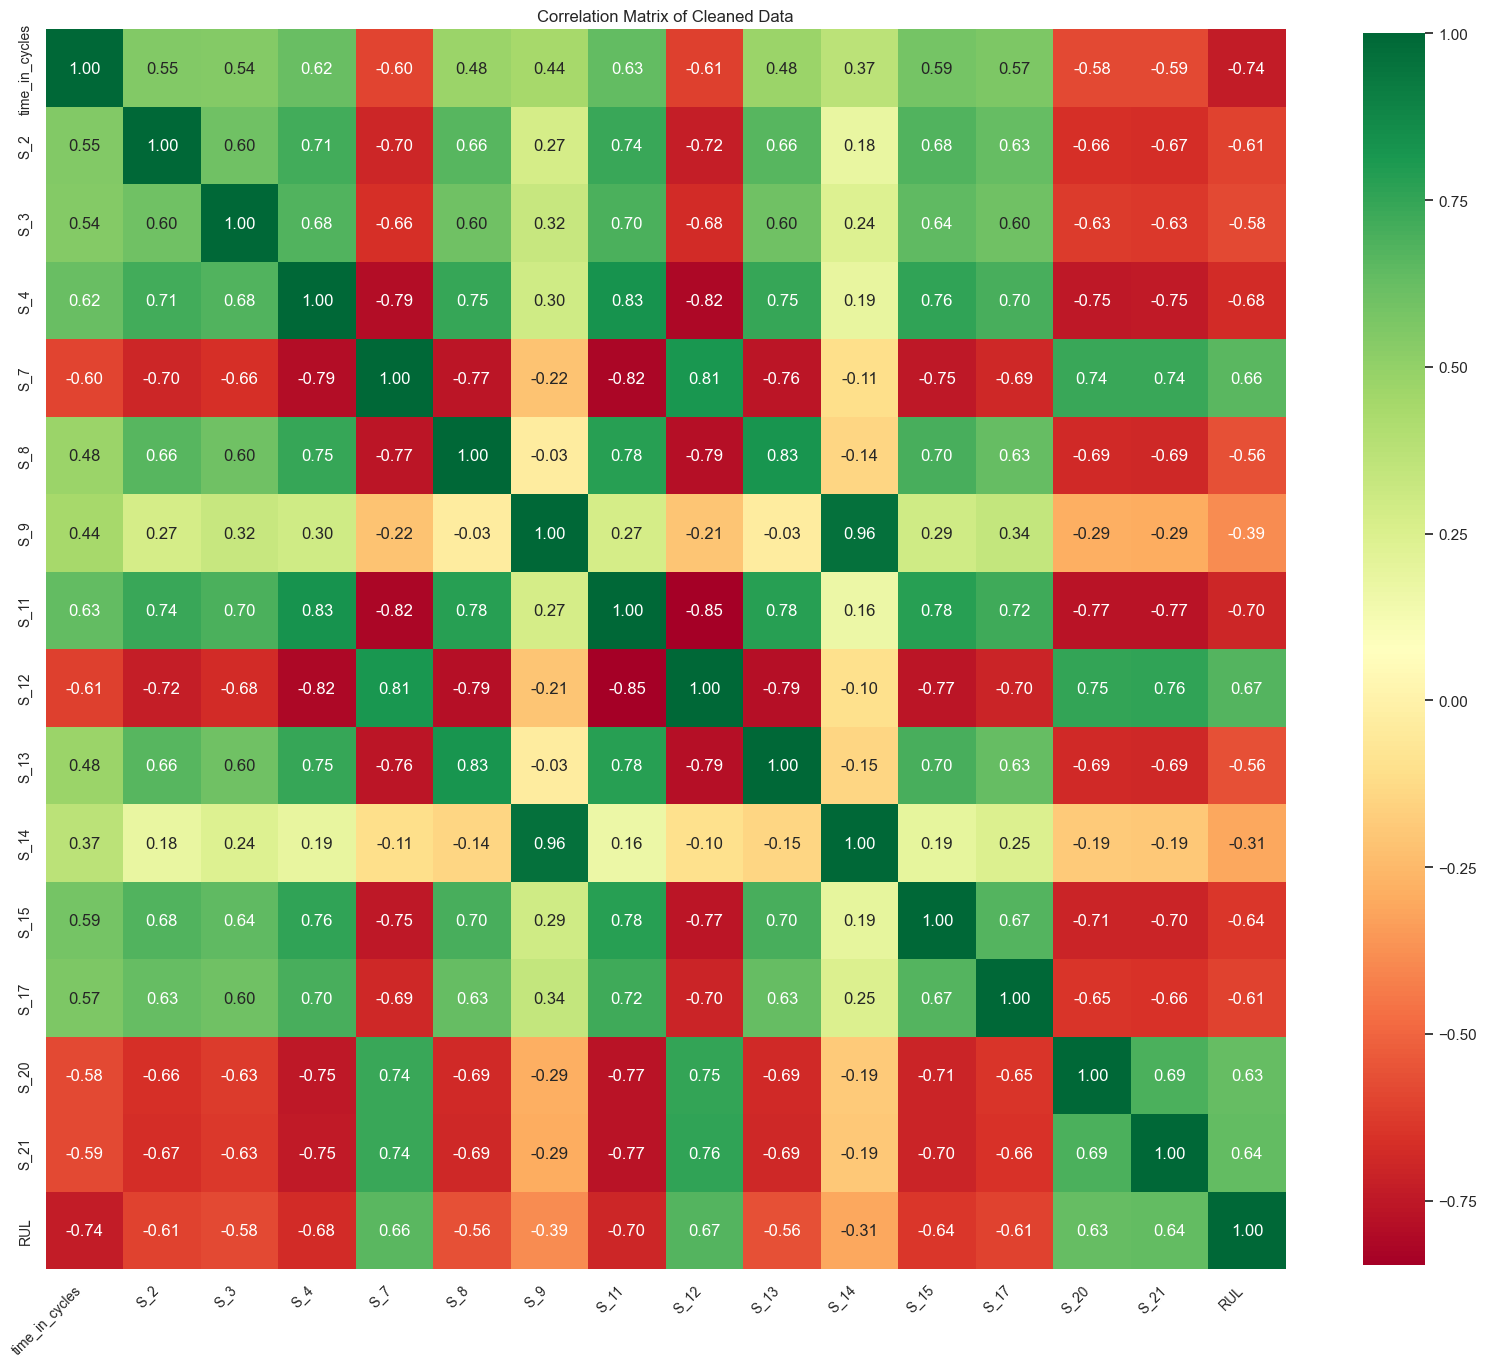

In [602]:
# Revised Heat map
#Creating a heatmap to compare with RUL
corr = df_cleaned.corr()

# Create a heatmap and annotate it
plt.figure(figsize=(20, 20))  # Set the size of the figure directly
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", square=True, cbar_kws={'shrink': .8})

# Adding labels (assuming column names are appropriate to be used directly)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability
plt.yticks(fontsize=10)  # Adjust y labels fontsize if needed

plt.title('Correlation Matrix of Cleaned Data')  
plt.show()

DATA PREPROCESSING

In [603]:
# Test data
test_FD001 = r"C:\Users\JAHNAVI\Desktop\archive\CMaps\test_FD001.txt"
test_FD002 = r"C:\Users\JAHNAVI\Desktop\archive\CMaps\test_FD002.txt"
test_FD003 = r"C:\Users\JAHNAVI\Desktop\archive\CMaps\test_FD003.txt"
test_FD004 = r"C:\Users\JAHNAVI\Desktop\archive\CMaps\test_FD004.txt"

# Test labels (RUL)
test_RUL01 = r"C:\Users\JAHNAVI\Desktop\archive\CMaps\RUL_FD001.txt"
test_RUL02 = r"C:\Users\JAHNAVI\Desktop\archive\CMaps\RUL_FD002.txt"
test_RUL03 = r"C:\Users\JAHNAVI\Desktop\archive\CMaps\RUL_FD003.txt"
test_RUL04 = r"C:\Users\JAHNAVI\Desktop\archive\CMaps\RUL_FD004.txt"


In [604]:
# Loading Test data (x_test) and Test labels (y_test)

test_df_1 = load_data(test_FD001)
print("Test Data:")
test_df_1.head()



Test Data:


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [605]:
rul_1 = load_data(test_RUL01)
print("RUL of the last cycle of each unit number:")
rul_1.head()

RUL of the last cycle of each unit number:


,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [606]:
# Checking for NaN values
print("NaN values for Test data:")
print(check_nan(test_df_1))

print("Nan values for RUL:")
print(check_nan(rul_1))

# Removing the columns with all NaN vaues
test_data = remove_nan(test_df_1)
rul_1 = remove_nan(rul_1)


NaN values for Test data:
Total number of NaN values:
 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    13096
27    13096
dtype: int64
None
Nan values for RUL:
Total number of NaN values:
 0      0
1    100
dtype: int64
None


In [607]:
test_data


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [608]:
rul_1

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [609]:
# Assigning Column Names
test_data = column_names(test_data)
test_data

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,S_1,S_2,S_3,S_4,S_5,...,S_12,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_20,S_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [610]:
column_names = ['RUL']
rul_1.columns = column_names
rul_1

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [611]:
# Assume each RUL value in RUL_df corresponds to the respective unit by their indices
rul_1['unit_number'] = rul_1.index + 1  # Create a 'unit_number' column if it's aligned by index

# Merge RUL values into the test data based on 'unit_number'
test_data = test_data.merge(rul_1, on='unit_number', how='left')

# Calculate the maximum cycle number per unit to determine the last operational cycle
test_data['max_cycle'] = test_data.groupby('unit_number')['time_in_cycles'].transform(max)

# Calculate the RUL for each cycle as the difference between the last cycle and current cycle plus RUL at last cycle
test_data['RUL'] = (test_data['max_cycle'] - test_data['time_in_cycles']) + test_data['RUL']

# Cleanup by removing the temporary 'max_cycle' column
test_data.drop(columns=['max_cycle'], inplace=True)

# Final check of the updated data
test_data

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,S_1,S_2,S_3,S_4,S_5,...,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_20,S_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,21


In [612]:
y_test = test_data[['RUL']]
y_test

,RUL
0,142
1,141
2,140
3,139
4,138
...,...
13091,24
13092,23
13093,22
13094,21


In [613]:
x_test = test_data.drop(columns= ['RUL'])
x_test

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,S_1,S_2,S_3,S_4,S_5,...,S_12,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_20,S_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [614]:
x_train = df_cleaned.drop(columns= ['RUL'])
x_train

,time_in_cycles,S_2,S_3,S_4,S_7,S_8,S_9,S_11,S_12,S_13,S_14,S_15,S_17,S_20,S_21
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [615]:
# Making y_train data
# The RUL values that we calculated in the EDA process is the y_train data
y_train = df_RUL[['RUL']]
y_train

,RUL
0,191
1,190
2,189
3,188
4,187
...,...
20626,4
20627,3
20628,2
20629,1


In [616]:
# Assuming 'train' and 'test' are your DataFrame variables
# List of columns in the train DataFrame
train_columns = x_train.columns.tolist()

# Drop columns from the test DataFrame that are not in the train DataFrame
x_test = x_test[train_columns]
x_test

,time_in_cycles,S_2,S_3,S_4,S_7,S_8,S_9,S_11,S_12,S_13,S_14,S_15,S_17,S_20,S_21
0,1,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,2,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,3,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,4,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,5,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,195,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,196,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,197,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


Based on the EDA that we carried out, we have removed setting_3 and Sensor 1, 5, 10, 16, 18, 19 data columns from our Train dataset (x_train) because they donot have any correlation with each other when a Heatmap is plotted.
Similary, we now will remove the same columns from the Test data (x_test)

According to Heatmaps and Boxplots plotted in the EDA, we came to a conclusion that more columns can be dropped which donot carry more importance in the performance of the Turbofan Jet Engine.
Hence, the columns              are removed from both x_train and x_test dataframes and the updated data is saved and used for further training of Algorithms.

In [617]:
# SCALING Train and test data (x_train and x_test)
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the train data
scaler.fit(x_train)

# Transform both train and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert back to DataFrame
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)


In [618]:
x_train

,time_in_cycles,S_2,S_3,S_4,S_7,S_8,S_9,S_11,S_12,S_13,S_14,S_15,S_17,S_20,S_21
0,0.000000,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.002770,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.005540,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,0.008310,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,0.011080,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.540166,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,0.542936,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,0.545706,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,0.548476,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [619]:
x_test

,time_in_cycles,S_2,S_3,S_4,S_7,S_8,S_9,S_11,S_12,S_13,S_14,S_15,S_17,S_20,S_21
0,0.000000,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834
1,0.002770,0.150602,0.379551,0.222316,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827
2,0.005540,0.376506,0.346632,0.322248,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348
3,0.008310,0.370482,0.285154,0.408001,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110
4,0.011080,0.391566,0.352082,0.332039,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,0.534626,0.611446,0.619359,0.566172,0.573269,0.181818,0.541326,0.500000,0.426439,0.176471,0.584890,0.564063,0.500000,0.395349,0.418669
13092,0.537396,0.605422,0.537388,0.671843,0.542673,0.227273,0.533743,0.446429,0.503198,0.308824,0.572350,0.485956,0.583333,0.333333,0.528721
13093,0.540166,0.671687,0.482014,0.414754,0.513688,0.318182,0.561249,0.428571,0.530917,0.235294,0.605326,0.507888,0.583333,0.372093,0.429301
13094,0.542936,0.617470,0.522128,0.626435,0.566828,0.257576,0.570403,0.452381,0.562900,0.294118,0.622046,0.562524,0.583333,0.403101,0.518779


Now x_train, x_test, y_train and y_test dataframes can be used for Training any Machine Learning Algorithm and evaluating the performance.